# __D213 PA Task 2:__ *Sentiment analysis*
>### Aaminah Halipoto
>### Western Governor's University
>### D213: Advanced Data Analytics
>### Prof. William Sewell
>### Nov 17. 2024

### Table of Contents
>A1. [Research Question](#question) </br>
>A2. [Objectives or Goals](#goal)</br>
>A3. [Prescribed network](#prescribed)</br>
>B1. [Data exploration](#data)</br>
>B2. [Tokenization](#token)</br>
>B3. [Padding process](#pad)</br>
>B4. [Categories of sentiment](#cat)</br>
>B5. [Steps to prepare the data](#steps)</br>
>B6. [Prepared dataset](#dataset)</br>
>C1. [Model summary](#modelsum)</br>
>C2. [Network architecture](#net)</br>
>C3. [Hyperparameters](#hyper)</br>
>D1. [Stopping criteria](#stopping)</br> 
>D2. [Fitness](#fitness)</br>
>D3. [Training process](#training)</br>
>D4. [Predictive accuracy](#pred)</br>
>E. [Code](#code)</br>
>F. [Functionality](#funct)</br>
>G. [Recommendations](#rec)</br>
>H. [Reporting](#report)</br>
>I. [Sources for third-party code](#sourcescode)</br>
>J. [Sources](#sources)</br>


#### __A1. Research Question__ <a name="question"></a>
Using sentiment analysis via recurrent neural networks, can we accurately determine customer's satisfaction as positive or negative from user reviews in the Amazon, IMDB, and Yelp datasets? 

#### __A2. Objectives or Goals__ <a name="goal"></a>
My goal in this project is to use sentiment analysis to create a recurrent neural network model that can process user reviews from all 3 datasets and accurately quantify a customer's sentiment as positive or negative in order to adjust our services to their needs.

#### __A3. Prescribed network__ <a name="prescribed"></a>
The network used is a recurrent neural network, which handles sequential data and will classify text inputs to predict binary outcomes -- in this case, whether a review is expressing a positive or negative sentiment (AWS). The recursive memory storage feature allows RNNs to more accurately predict text-based sequences, which is necessary when working with large amounts of sequential data. 

In [6]:
%matplotlib inline
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sb
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from matplotlib import rcParams
import re
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = (10, 6)
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
porter = PorterStemmer()
from tensorflow import keras
from keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint, EarlyStopping

#import os
#dirname = os.getcwd()
#filename = os.path.join(dirname, 'amazon_cells_labelled.txt')
#df = pd.read_csv(filename, sep="\t", header=None, names=["text", "label"])

#(Sewell, n.d.)
amazon = pd.read_csv("C://Users/Aaminah/Desktop/masters/d213/sentiment labelled sentences/amazon_cells_labelled.txt", sep="\t", header=None, names=["review", "sentiment"])
imdb = pd.read_csv("C://Users/Aaminah/Desktop/masters/d213/sentiment labelled sentences/imdb_labelled.txt", sep="\t", header=None, names=["review", "sentiment"])
yelp = pd.read_csv("C://Users/Aaminah/Desktop/masters/d213/sentiment labelled sentences/yelp_labelled.txt", sep="\t", header=None, names=["review", "sentiment"])

# Concatenate
df = pd.concat((amazon, imdb, yelp), ignore_index=True)
pd.set_option('max_colwidth', 160)
# Print the first few rows of the concatenated dataframe
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aaminah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aaminah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aaminah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture and both were lacking.,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go back.,0
2746,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0


#### __B1. Data exploration__ <a name="data"></a>
Initial data analysis on the concatenated 3 datasets is included below.

In [8]:
df.shape

(2748, 2)

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [10]:
df.isnull().any()

review       False
sentiment    False
dtype: bool

sentiment
1    1386
0    1362
Name: count, dtype: int64


<Axes: xlabel='sentiment'>

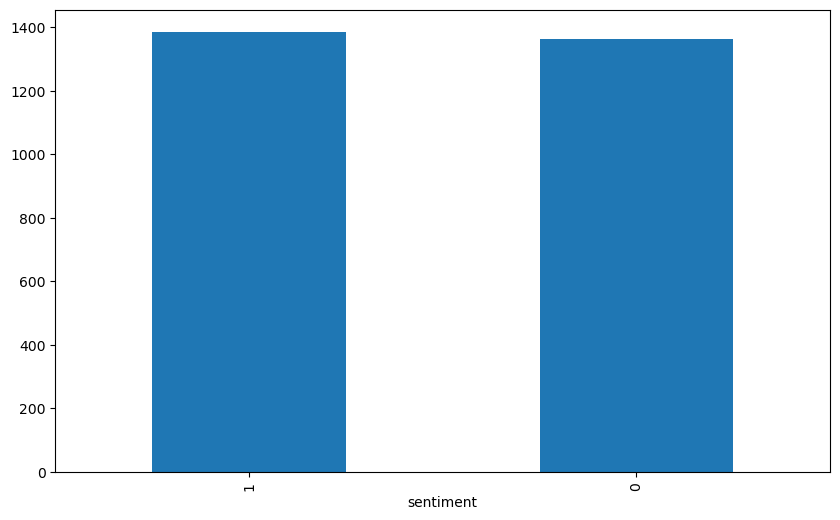

In [11]:
print(df['sentiment'].value_counts())
df['sentiment'].value_counts().plot(kind='bar')

Punctuation characters such as commas, exclamation points, and apostraphes are sought and removed via Regex. 

In [13]:
#(Gupta, 2023)
p = re.compile(r'[^\w\s]+')
df['review'] = [p.sub(' ', x) for x in df['review'].tolist()]
df

,review,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter,0
1,Good case Excellent value,1
2,Great for the jawbone,1
3,Tied to charger for conversations lasting more than 45 minutes MAJOR PROBLEMS,0
4,The mic is great,1
...,...,...
2743,I think food should have flavor and texture and both were lacking,0
2744,Appetite instantly gone,0
2745,Overall I was not impressed and would not go back,0
2746,The whole experience was underwhelming and I think we ll just go to Ninja Sushi next time,0


All reviews are converted to lowercase.

In [15]:
#(Sewell, n.d.-a)
df['review'] = df['review'].str.lower()
df

,review,sentiment
0,so there is no way for me to plug it in here in the us unless i go by a converter,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more than 45 minutes major problems,0
4,the mic is great,1
...,...,...
2743,i think food should have flavor and texture and both were lacking,0
2744,appetite instantly gone,0
2745,overall i was not impressed and would not go back,0
2746,the whole experience was underwhelming and i think we ll just go to ninja sushi next time,0


The maximum length of reviews is 7944 characters, the minimum is 7 characters, and the mean of all reviews is about 72 characters.

In [17]:
reviewlength = df['review'].str.len()
reviewlength.max()

7923

In [18]:
reviewlength.min()

7

In [19]:
reviewlength.mean()

71.31077147016012

Lemmatization is the process of reducing words to their root word by removing all tenses, plurals, and so on -- for example, 'advancing' after lemmatization becomes 'advance'.

In [21]:
lemmatizer = WordNetLemmatizer()

def lem (token_text):
    text=[lemmatizer.lemmatize(word)for word in token_text]
    return text
df['review'].apply(lambda x: lem(x))
df['Lemmed_words'] = [len(x.split()) for x in df['review'].tolist()]
df['Lemmed_chars'] = df['review'].apply(len)
df

,review,sentiment,Lemmed_words,Lemmed_chars
0,so there is no way for me to plug it in here in the us unless i go by a converter,0,21,82
1,good case excellent value,1,4,27
2,great for the jawbone,1,4,22
3,tied to charger for conversations lasting more than 45 minutes major problems,0,12,78
4,the mic is great,1,4,17
...,...,...,...,...
2743,i think food should have flavor and texture and both were lacking,0,12,66
2744,appetite instantly gone,0,3,24
2745,overall i was not impressed and would not go back,0,10,50
2746,the whole experience was underwhelming and i think we ll just go to ninja sushi next time,0,17,91


In [22]:
df['Lemmed_words'].mean()

13.328602620087336

I have found 5290 distinct words in the vocabulary, and a proposed embedded word length of 8.52. The max review length after sorting through all reviews is 1637 words. 

In [24]:
#(Reiswig, n.d.)
reviews = df['review'].tolist()
vocab = []
max_review_len = 72

for review in reviews:
    review_len = len(review.split(" "))
    if review_len > max_review_len:
        max_review_len = review_len

for review in reviews:
    for word in review.split(" "):
        if not word in vocab:
            vocab.append(word)

vocab_size = len(vocab)

print("Vocab:  ", vocab_size)
print("Longest:  ", max_review_len)
print("Emb Size:  ", len(vocab)**0.25)

Vocab:   5290
Longest:   1637
Emb Size:   8.528328451922611


In [25]:
df.to_csv('C://Users/Aaminah/Desktop/masters/D213/cleaned_pretoken.csv',index=False)

#### __B2. Tokenization__ <a name="token"></a>
Tokenization is the process of breaking down sentences into the smallest components, in this case individual words. These tokens provide the basic building blocks for the neural network to understand. We enact tokenization on the dataset via tensorflow.keras.preprocessing Tokenizer package, where we input the vocabulary size and apply it to the cleaned dataset. Tokens are then encoded into numbers that refer back to a unique word in the dataset. The end goal of tokenizing and encoding is essentially an index of integers referring back to a single word, or token.

In [27]:
#(Sewell, n.d. -a)
stop_words = set(stopwords.words('english'))
data_set = []
for review in df.review: 
    data_set.append([word for word in word_tokenize(review) if word not in stop_words])

#embedding words
x = data_set
y = df['review']
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(x)
encoded_docs = tokenizer.texts_to_sequences(x)
#print('''\n''', x)

In [28]:
print(df.review[0])
print(x[0])
print(encoded_docs[0])

so there is no way for me to plug it in here in the us unless i go by a converter 
['way', 'plug', 'us', 'unless', 'go', 'converter']
[44, 263, 96, 459, 24, 2122]


In [29]:
#corroborating encoded review above
print(tokenizer.word_index)

{'good': 1, 'great': 2, 'movie': 3, 'phone': 4, 'film': 5, 'one': 6, '0': 7, '1': 8, 'food': 9, 'like': 10, 'place': 11, 'time': 12, 'service': 13, 'bad': 14, 'really': 15, 'well': 16, 'would': 17, 'best': 18, 'even': 19, 'ever': 20, 'also': 21, 'back': 22, 'quality': 23, 'go': 24, 'love': 25, 'made': 26, 'product': 27, 'work': 28, 'get': 29, 'excellent': 30, 'works': 31, 'could': 32, 'nice': 33, 'better': 34, 'never': 35, 'sound': 36, 'recommend': 37, 'much': 38, 'use': 39, 'headset': 40, 'think': 41, 'first': 42, 'battery': 43, 'way': 44, 'pretty': 45, 'see': 46, 'acting': 47, 'make': 48, 'got': 49, 'worst': 50, 'still': 51, '2': 52, '10': 53, 'everything': 54, 'say': 55, 'enough': 56, 'two': 57, 'ear': 58, 'little': 59, 'disappointed': 60, 'every': 61, 'characters': 62, 'right': 63, 'going': 64, 'thing': 65, 'price': 66, 'amazing': 67, 'minutes': 68, 'waste': 69, 'people': 70, 'real': 71, 'definitely': 72, 'case': 73, 'terrible': 74, 'money': 75, 'look': 76, 'new': 77, 'know': 78, '

In [30]:
print(df.shape)
print(df.columns)
print(df.head())

(2748, 4)
Index(['review', 'sentiment', 'Lemmed_words', 'Lemmed_chars'], dtype='object')
                                                                               review  \
0  so there is no way for me to plug it in here in the us unless i go by a converter    
1                                                         good case  excellent value    
2                                                              great for the jawbone    
3      tied to charger for conversations lasting more than 45 minutes major problems    
4                                                                   the mic is great    

   sentiment  Lemmed_words  Lemmed_chars  
0          0            21            82  
1          1             4            27  
2          1             4            22  
3          0            12            78  
4          1             4            17  


#### __B3. Padding process__ <a name="pad"></a>
Padding is a necessary step before sectioning data for the model, as it makes the encoded sequences all the same length of items with zeroes in an absence of information. Tensorflow.keras.preprocessing pad_sequences carries out this function. The max length is 200, which is about 3 times greater than the mean of all reviews. Padding is completed post, with all zeroes occurring after encoded values. The result is a dataframe containing all encoded information, with every record being the same length of 200 items.

In [32]:
padded_sequence = pad_sequences(encoded_docs, maxlen=200, padding = 'post')
#2748 records as before, where all records are 200 in length
print(f'The original length is {len(encoded_docs)}')
print(f'The padded shape is {padded_sequence.shape}')

The original length is 2748
The padded shape is (2748, 200)


In [33]:
#cleaned record versus its encoded cognate
print(x[0])
print(encoded_docs[0])

['way', 'plug', 'us', 'unless', 'go', 'converter']
[44, 263, 96, 459, 24, 2122]


In [34]:
#the same encoded record with post-padding
print(padded_sequence[0])

[  44  263   96  459   24 2122    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

#### __B4. Categories of sentiment__ <a name="cat"></a>
There are 2 categories of sentiment -- positive and negative -- necessitating the creation of a binary classification model. This makes the dense layer at the end of the model have a 'sigmoid' activation type.

Below is the process of factorizing the sentiment column, which is useful for predictions later on.

In [36]:
df['sentiment_label'] = df['sentiment']
dict_sentiment = {"sentiment_label": {0: 'Negative',1: 'Positive'}}

In [37]:
df = df.replace(dict_sentiment)
df["sentiment_label"]= df["sentiment_label"].astype(object)

In [38]:
sentiment_label = df['sentiment_label'].factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 0, 0], dtype=int64),
 Index(['Negative', 'Positive'], dtype='object'))

#### __B5. Steps to prepare the data__ <a name="steps"></a>
The steps so far have been: concatenating datasets into one dataframe, cleaning data of any nulls or duplicates, converting text to lowercase, removing punctuation, lemmatizing, tokenizing, encoding, and padding. Since the data is cleaned and encoded, we can now split the data based on the industry standard of training 80% and testing 20% (Encord, n.d.). This ensures enough data to train the learning model, but also enough data to compare outputs against when testing.

In [40]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequence, df['sentiment'], test_size=0.2, random_state=7)

#### __B6. Prepared dataset__ <a name="dataset"></a>
Below, the numpy array of padded data is converted to dataframe and exported as a .csv file, along with each training test split.

In [42]:
df_padded = pd.DataFrame(padded_sequence)
df_padded

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,44,263,96,459,24,2122,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,73,30,412,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2123,142,961,962,1355,68,1356,186,0,0,...,0,0,0,0,0,0,0,0,0,0
4,748,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,41,9,262,1298,565,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2744,5038,5039,878,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2745,169,144,17,24,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2746,253,79,2005,41,24,5040,261,196,12,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_padded.to_csv('C://Users/Aaminah/Desktop/masters/D213/cleaned_total.csv',index=False)

In [44]:
df_x_train = pd.DataFrame(x_train) 
df_x_train.to_csv('C://Users/Aaminah/Desktop/masters/D213/x_train_pt1.csv', index=False)

In [45]:
df_x_test = pd.DataFrame(x_test) 
df_x_test.to_csv('C://Users/Aaminah/Desktop/masters/D213/x_test_pt1.csv', index=False)

In [46]:
df_y_train = pd.DataFrame(y_train) 
df_y_train.to_csv('C://Users/Aaminah/Desktop/masters/D213/y_train_pt1.csv', index=False)

In [47]:
df_y_test = pd.DataFrame(y_test) 
df_y_test.to_csv('C://Users/Aaminah/Desktop/masters/D213/y_test_pt1.csv', index=False)

#### __C1. Model summary__ <a name="modelsum"></a>
Keras provides the framework for sequential models, consisting of layers that pass on tensor array outputs to layers below. Each layer contributes to the process in which the input training data is parsed, recursively learned from, and outputted into a model. The model is created with the vocabulary size, suggested embedded length of 32, and input_length of 200, which is the length of the padded sequences. 

In [49]:
#(Sewell, n.d.)
model = Sequential() 
model.add(Embedding(vocab_size, 32, input_shape = (x_train.shape[1],)))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 32)        │       169,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 200, 32)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        16,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,931 (726.29 KB)

 Trainable params: 185,931 (726.29 KB)

 Non-trainable params: 0 (0.00 B)

None


#### __C2. Network architecture__ <a name="net"></a>
According to Keras documentation, the 5 layers are as follows: </br>
>Embedding layers use the vocabulary size and embedding size to learn the relationship between the inputs, which are words (Panchal, n.d.).</br>
>Spatial dropout1D layer promotes independence between feature maps, where 0.5 is the fraction of the units to drop for the linear transformation of inputs and the recurrent state.</br>
>LSTM input layer takes in the array of training data and activates to the output, providing persistent memory. </br>
>Dropout layer is an extra layer to prevent overfitting, where 0.2 is the fraction of input units to drop.</br>
>Dense layer connects the input to the outputs in each layer, where the sigmoid activation correlates to the binary sentiment outputs in the data. This is the output layer. </br>

The total number of parameters is 185,931. These refer to the total weights and biases in the training set. According to Klu AI, "weights adjust the influence of inputs on outputs by controlling the connection strength between neurons. Biases are constants added to neurons, ensuring activation even without input." 

#### __C3. Hyperparameters__ <a name="hyper"></a>
The activation function 'sigmoid' refers to our binary sentiment output. The maximum number of epochs or iterations is 20, which is recommended.  The batch size of records processed at once is 512, which performed better than 256 or 128. The optimizer used is adam, which is well-suited to the amount of binary data being processed. Nodes are also known as neurons or units within each layer: the dense layer, for example, has 1 node, compared to LSTM layer's 50 nodes. The loss function is binary_crossentropy, meaning losses are calculated from subtracting the y_pred probability from the y_true binary value. The state of fit will be evaluated by loss and accuracy.

#### __D1. Stopping criteria__ <a name="stopping"></a>
Patience is the number of epochs with no improvement at which point training ends, set to 3. Enabled in the early stopping monitor, this is a good measure to prevent overfitting the model.

The model stopped running at 4 epochs, indicating the optimal point of stopping for the model.

In [53]:
early_stopping_monitor = EarlyStopping(patience=3)
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test), callbacks=[early_stopping_monitor])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.4825 - loss: 0.6943 - val_accuracy: 0.4782 - val_loss: 0.6932
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.4928 - loss: 0.6935 - val_accuracy: 0.4782 - val_loss: 0.6936
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.5065 - loss: 0.6937 - val_accuracy: 0.4782 - val_loss: 0.6937
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.4945 - loss: 0.6934 - val_accuracy: 0.4782 - val_loss: 0.6936


#### __D2. Fitness__ <a name="fitness"></a>
The history function of sequential modeling shows the accuracy, val_accuracy, loss, and val_loss measures for each epoch run. Val_accuracy is the degree to which the model accurately predicted values, and val_loss is the difference between actual and predicted values. Val_accuracy of 0.4782 and val_loss of 0.6932 indicate a 48% overall accuracy, with around 0.7 units in losses. The comparison of val_accuracy and accuracy can tell us if the model is overfit: given that respective values are similar (0.4909 vs 0.4782 for accuracy and 0.6938 vs 6932 for loss), we can conclude that the early stopping measure was successful in preventing overfitting in this model. 

In [55]:
history.history

{'accuracy': [0.49090081453323364,
  0.49408552050590515,
  0.5090991854667664,
  0.4959053695201874],
 'loss': [0.6938977241516113,
  0.6936272978782654,
  0.6935776472091675,
  0.6933057904243469],
 'val_accuracy': [0.4781818091869354,
  0.4781818091869354,
  0.4781818091869354,
  0.4781818091869354],
 'val_loss': [0.6932454109191895,
  0.6935601830482483,
  0.6936644315719604,
  0.6936014294624329]}

#### __ED3. Training process__ <a name="training"></a>
The models below display the model's accuracy and loss measures per epoch.

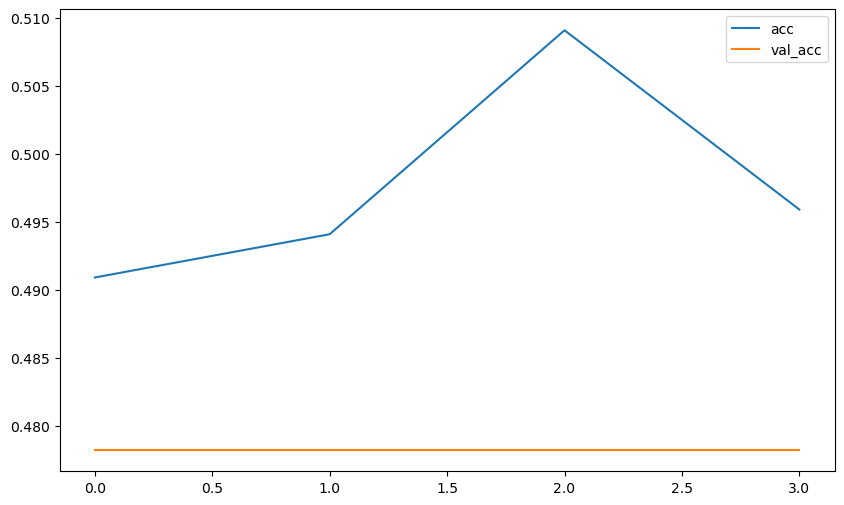

<Figure size 1000x600 with 0 Axes>

In [57]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

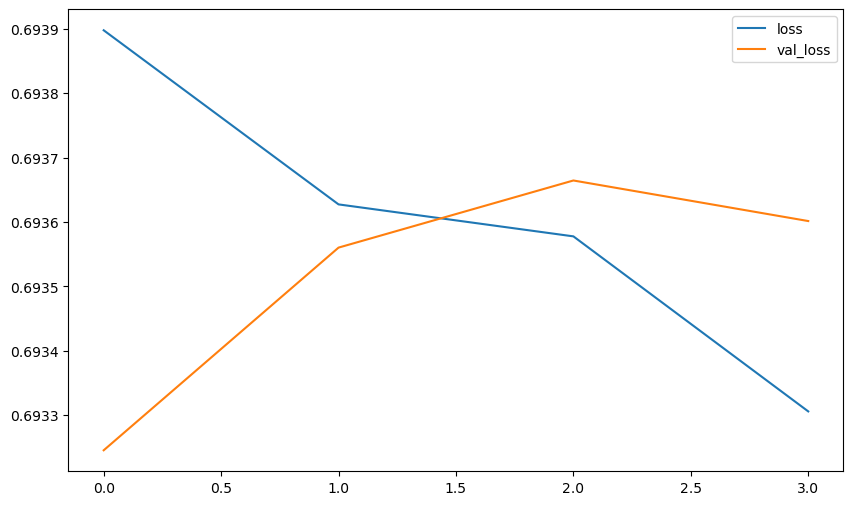

<Figure size 1000x600 with 0 Axes>

In [58]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

#### __D4. Predictive accuracy__ <a name="pred"></a>
The model is not very accurate; less than 50% of its overall predictions were correct according to the val_accuracy. Despite the val_ measures being very similar to accuracy and losses of the training data, there is still a sizeable difference between both measures as seen in the graphs above. When predicting sentiment using this model, this inaccuracy is evident. Both labels below are erroneously predicted as negative when one is positive; around 50% of the total tested inputs are classified accurately.

In [60]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [61]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
Predicted label:  Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted label:  Negative


#### __E. Code__ <a name="code"></a>
The model is saved as a .keras file below. 

In [67]:
model.save('C://Users/Aaminah/Desktop/masters/D213/model.keras')

#### __F. Functionality__ <a name="funct"></a>
With an average accuracy of about 49%, the model has a long way to go before it is truly useful in high-profile cases. The early stopping measure ensured no overfitting, so the number of epochs that the model settles at is the most optimized. The loss function is calculated by binary crossentropy, which could be changed in order to find more accurate measures of loss. Overall the large batch size  means more data is processed at once, which the model has proved to be capable of doing. Setting the initial embedding input_length value to 200 accommodates the total length of each padded record, meaning as much of each record is processed as possible. This model is flexible to myriad datasets, where specific hyperparameters such as the activation function and optimizers would be tweaked to accommodate data beyond the binary sequential data used here. Until adjustments are made to make the model more accurate, this model is likely not functional for significant use.

#### __G. Recommendation__ <a name="rec"></a>
The model has poor accuracy, but still holds some potential to be improved. Tweaks to batch sizes, the number of epochs run through, fine-tuning the length of vocabulary in the dataset, as well as changing the method of nodes per layer are all avenues through which the model's accuracy could increase. 

#### __H. Reporting__<a name="report"></a>
The code is provided in 'ahalipoto_pa2.ipynb'. The HTML version of this presentation is saved as 'ahalipoto_pa2.html'.

#### __I. Sources for third-party code__ <a name="sourcescode"></a>
Gupta, K. (2023, February 21). Remove punctuation from string using Python (4 best methods). FavTutor. https://favtutor.com/blogs/remove-punctuation-from-string-python

Reiswig, N. (n.d.). Advanced-data-analytics/d213sentimentneuralnetworks.ipynb at main · Nicolereiswig/advanced-data-analytics. GitHub. https://github.com/NicoleReiswig/Advanced-Data-Analytics/blob/main/D213SentimentNeuralNetworks.ipynb 

Sewell, W. (n.d.). D213 SA Webinar 4. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c2642337-7947-4e7c-aa8d-af7b01456876

Sewell, W. (n.d.-a). Webinar 5 SA. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8502edc2-27b3-46ed-ab9c-af89012040ed

#### __J. Web Sources__ <a name="sources"></a>
Keras. (n.d.). Keras Documentation: Core layers. https://keras.io/api/layers/core_layers/ 

Panchal, S. (1964, July 1). Uses of embedding/ embedding layer in deep learning. Stack Overflow. https://stackoverflow.com/questions/56333914/uses-of-embedding-embedding-layer-in-deep-learning 

Sewell, W. (n.d.-a). Advanced Data Analytics D213 Advanced Data Analytics. SRM. https://srm--c.vf.force.com/servlet/fileField?retURL=https%3A%2F%2Fsrm--c.vf.force.com%2Fapex%2FCourseArticle%3Fid%3DkA0S60000000o01KAA%26groupId%3D%26searchTerm%3D%26courseCode%3DD213%26rtn%3D%252Fapex%252FCommonsExpandedSearch&entityId=ka0S60000004X5RIAU&_CONFIRMATIONTOKEN=VmpFPSxNakF5TkMweE1TMHlORlF3TWpvd09Ub3hOUzR4TXpGYSxLcXBJZmh4S3AwZzBRNkdIQmE0VktQcEZjQU5KYVVRNmc1LWJaZ0g2TDdJPSxaREZrWVdOaQ%3D%3D&common.udd.actions.ActionsUtilORIG_URI=%2Fservlet%2FfileField&field=FileUpload__Body__s 

Tokenizing text in Python. IBM developer. (n.d.). https://developer.ibm.com/tutorials/awb-tokenizing-text-in-python/ 

Training, validation, test split for Machine Learning Datasets. Encord. (n.d.). https://encord.com/blog/train-val-test-split/ 

Verma, S. (2023, July 17). Understanding input and output shapes in LSTM: Keras. Medium. https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e 

What are weights and biases?. Klu. (n.d.). https://klu.ai/glossary/weights-and-biases 

What is RNN? - recurrent neural networks explained - AWS. What is RNN (Recurrent Neural Network)? (n.d.). https://aws.amazon.com/what-is/recurrent-neural-network/ 